In [65]:
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns



In [66]:
import matplotlib.pyplot as plt

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
customer_data = pd.read_csv("CustomerData.csv")

In [69]:
customer_data.head(5)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [70]:
customer_data.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [71]:
customer_data.City = customer_data.City.astype("category")
customer_data.FavoriteChannelOfTransaction = customer_data.FavoriteChannelOfTransaction.astype("category")
customer_data.FavoriteGame = customer_data.FavoriteGame.astype("category")

In [72]:
customer_data.head(6)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
CustomerID                      3209 non-null int64
City                            3209 non-null category
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null category
FavoriteGame                    3209 non-null category
TotalRevenueGenerated           3209 non-null float64
dtypes: category(3), float64(1), int64(10)
memory usage: 285.5 KB


In [73]:
customer_data.shape

(3209, 14)

In [74]:
custome_data_bk = customer_data.copy()

In [11]:
customer_data = pd.get_dummies(customer_data,columns=["City","FavoriteChannelOfTransaction","FavoriteGame"],drop_first=True)

In [75]:
customer_data = customer_data.drop('CustomerID', axis =1)

In [76]:

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 13 columns):
City                            3209 non-null category
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null category
FavoriteGame                    3209 non-null category
TotalRevenueGenerated           3209 non-null float64
dtypes: category(3), float64(1), int64(9)
memory usage: 260.5 KB


In [14]:
columns = list(customer_data.columns)
customer_data = customer_data[[columns[10]]+columns[:9]+ columns[11:15] + [columns[9]]]
customer_data.head(2)

,City_2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction_Uniform,FavoriteGame_NONE,FavoriteGame_Uniform,TotalRevenueGenerated
0,0,2,3,8,210,11,11,2344,108,10,1,0,1,107.51
1,0,2,3,6,442,20,20,245,22,7,0,0,1,382.40


In [77]:
customer_data.isna().sum()


City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In [78]:
customer_data.shape

(3209, 13)

In [79]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 13 columns):
City                            3209 non-null category
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null category
FavoriteGame                    3209 non-null category
TotalRevenueGenerated           3209 non-null float64
dtypes: category(3), float64(1), int64(9)
memory usage: 260.5 KB


In [105]:
#data[num_attr].corr() where num_attr are numeric attributes and corr function gives
#correlation
customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,12]].corr()
                  

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
NoOfChildren,1.000000,-0.179176,0.189002,0.085341,0.137630,0.137040,0.165036,0.213342,0.131398,0.107365
MinAgeOfChild,-0.179176,1.000000,0.367127,-0.055820,-0.017568,-0.006191,0.006690,0.000104,-0.007748,0.024724
MaxAgeOfChild,0.189002,0.367127,1.000000,-0.040329,-0.006213,-0.003926,0.012095,0.027947,-0.007062,0.005891
Tenure,0.085341,-0.055820,-0.040329,1.000000,0.193344,0.192413,0.241809,0.273696,0.188285,0.116437
FrquncyOfPurchase,0.137630,-0.017568,-0.006213,0.193344,1.000000,0.934131,0.279957,0.397567,0.947787,0.663328
NoOfUnitsPurchased,0.137040,-0.006191,-0.003926,0.192413,0.934131,1.000000,0.311982,0.436149,0.868374,0.750379
FrequencyOFPlay,0.165036,0.006690,0.012095,0.241809,0.279957,0.311982,1.000000,0.740204,0.286943,0.233540
NoOfGamesPlayed,0.213342,0.000104,0.027947,0.273696,0.397567,0.436149,0.740204,1.000000,0.399178,0.293995
NoOfGamesBought,0.131398,-0.007748,-0.007062,0.188285,0.947787,0.868374,0.286943,0.399178,1.000000,0.495759
TotalRevenueGenerated,0.107365,0.024724,0.005891,0.116437,0.663328,0.750379,0.233540,0.293995,0.495759,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E34380588>,
      dtype=object)

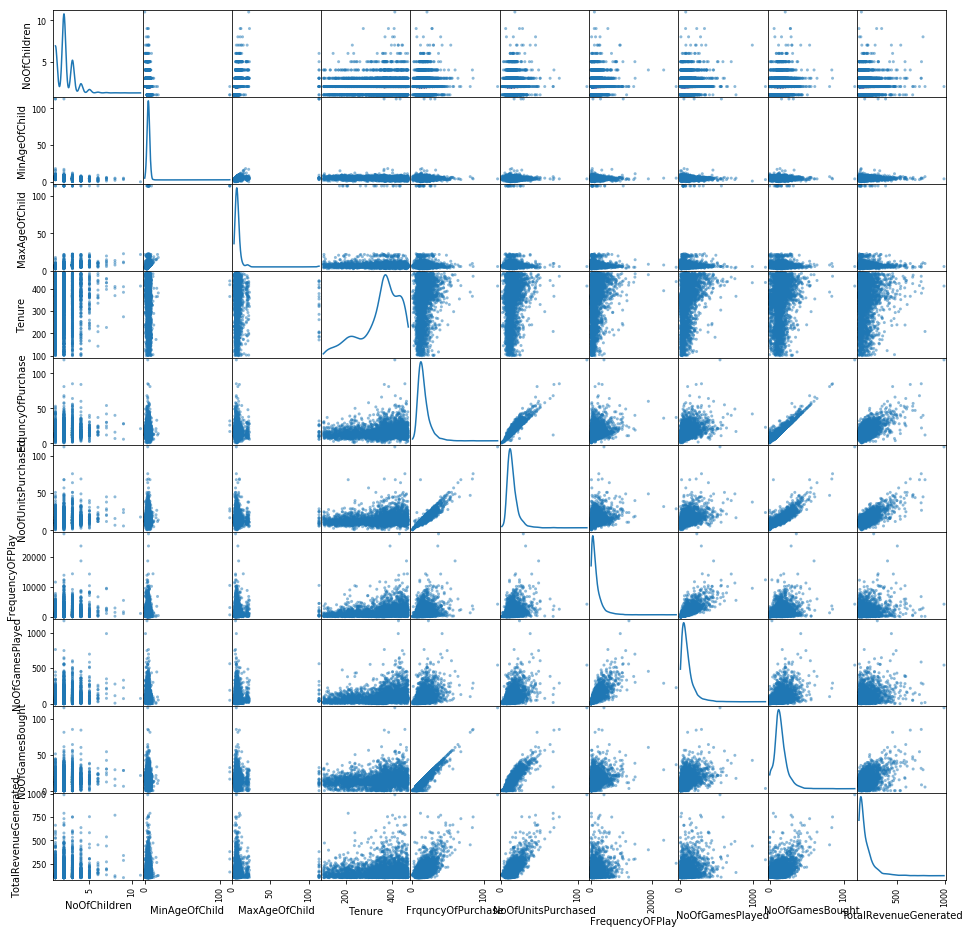

In [106]:
pd.plotting.scatter_matrix(customer_data, figsize=(16, 16), diagonal='kde')


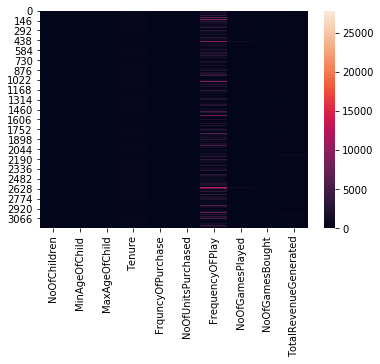

In [110]:
sns.heatmap(customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,12]]) 

In [111]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


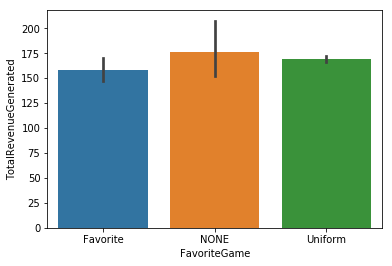

In [22]:
#Visualizing the same using seaborn package and scatter_matrix from pandas module
sns.barplot(x= "FavoriteGame", y= "TotalRevenueGenerated", data = custome_data_bk)

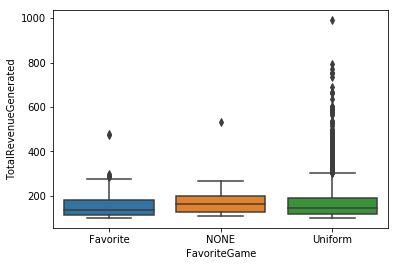

In [23]:
# Explore seaborn package to plot barplot for favourite game column, get boxplot for
#revenue wrt favourite game column
sns.boxplot(x = "FavoriteGame", y = "TotalRevenueGenerated", data = custome_data_bk)

In [112]:
#6 Split the data into train and test: use function train_test_split
customer_train, customer_test = train_test_split(customer_data, test_size = 0.2)

In [113]:
customer_train.shape

(2567, 13)

In [114]:
customer_train.shape
customer_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567 entries, 2727 to 1687
Data columns (total 13 columns):
City                            2567 non-null category
NoOfChildren                    2567 non-null int64
MinAgeOfChild                   2567 non-null int64
MaxAgeOfChild                   2567 non-null int64
Tenure                          2567 non-null int64
FrquncyOfPurchase               2567 non-null int64
NoOfUnitsPurchased              2567 non-null int64
FrequencyOFPlay                 2567 non-null int64
NoOfGamesPlayed                 2567 non-null int64
NoOfGamesBought                 2567 non-null int64
FavoriteChannelOfTransaction    2567 non-null category
FavoriteGame                    2567 non-null category
TotalRevenueGenerated           2567 non-null float64
dtypes: category(3), float64(1), int64(9)
memory usage: 228.4 KB


In [ ]:
# 9. Observe that ols function needs a formula and data. Formula is like the one that you have given
#in R. Observe that type of that formula is a string. So you need to use jo##in function to get the
#formula

In [115]:
x = '+'.join(customer_train.columns.values[:-1])

In [116]:
x

'City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame'

In [117]:
formula = "~".join((customer_train.columns.values[-1],x))

In [118]:
print(formula)

TotalRevenueGenerated~City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame


In [119]:
# 10 Now use the ols function with the formula and data. Fit the data and observe the results.
lm_mod = ols(formula = formula, data = customer_train) # Model creation

AttributeError: 'OLS' object has no attribute 'describe'

In [120]:
result = lm_mod.fit()


In [121]:
print(result.summary2())

                             Results: Ordinary least squares
Model:                    OLS                         Adj. R-squared:           0.728     
Dependent Variable:       TotalRevenueGenerated       AIC:                      26511.8870
Date:                     2018-12-24 02:33            BIC:                      26593.7939
No. Observations:         2567                        Log-Likelihood:           -13242.   
Df Model:                 13                          F-statistic:              530.1     
Df Residuals:             2553                        Prob (F-statistic):       0.00      
R-squared:                0.730                       Scale:                    1780.5    
------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------------------------------
Intercept                    

In [122]:
preds_tr = result.predict(exog = customer_train)
preds_test= result.predict(exog = customer_test)

In [48]:
preds_tr
preds_test

960     204.146221
2698    121.692297
3138    140.268942
1564    146.592908
1106    137.829356
444     229.379155
2355    239.867888
66      135.090322
3189    216.032303
2906    189.260428
2593    121.484298
1700    128.949400
2187    143.787092
1012    170.105260
1219    182.827076
927     105.578155
2271    232.021424
2255    123.972334
514     151.885985
401     147.877972
1639    103.176402
225     126.173236
1020     88.754933
344     159.475474
1298    741.798812
1265    171.004219
284     140.319221
706     129.697361
3132    354.630699
2614    107.987175
           ...    
2087    161.109076
882     143.462132
2276    120.608570
487     155.594348
2697    169.086453
3030    521.875604
1830    242.355382
2207    142.515173
1453    138.206204
34      174.970892
871     287.256078
516     148.904099
1864    183.704776
2144    200.807693
2325    214.661220
1079    133.404140
2054    209.817765
1479    142.503428
2438    150.939087
1843    112.997268
713     123.633566
2316     89.

In [123]:
##11 Observe the diagnostic plots: Residuals vs fitted, qqplot, Residuals vs Leverage
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

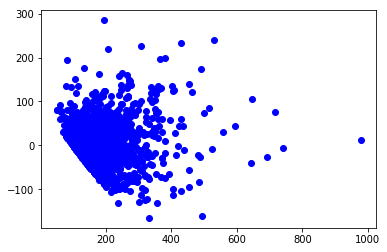

In [124]:
plt.plot(preds_tr,result.resid,'bo')

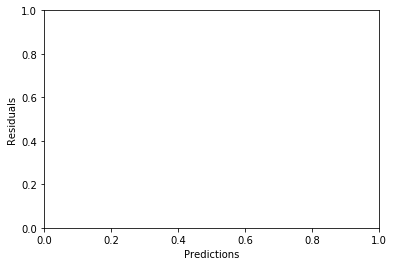

In [125]:
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show(block=True)


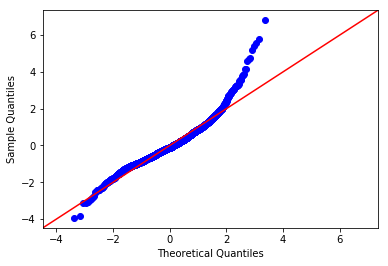

In [126]:
inf = result.get_influence()
sm.qqplot(inf.resid_studentized_internal,line='45')
plt.show(block=True)

<Figure size 432x288 with 0 Axes>

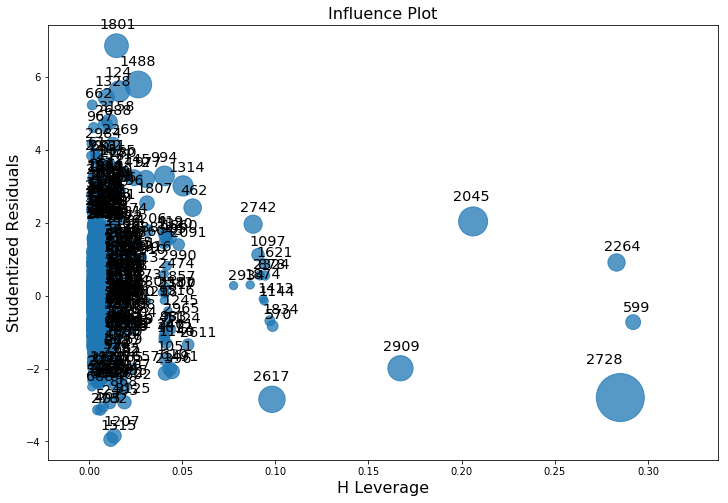

In [128]:
plt.figure()
fig,ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result, alpha =0.05, ax=ax, criterion="cooks")
plt.show(block=True)

In [130]:
# Remove the data points that have high leverage
subset = ~customer_train.index.isin(["2617", "2909","2045","2264","599","2728"])
lm_model2 = ols(formula, data = customer_train, subset = subset).fit()
print(lm_model2.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.725
Model:                               OLS   Adj. R-squared:                  0.724
Method:                    Least Squares   F-statistic:                     517.3
Date:                   Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                           02:38:14   Log-Likelihood:                -13198.
No. Observations:                   2561   AIC:                         2.642e+04
Df Residuals:                       2547   BIC:                         2.651e+04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [131]:
# Using sklearn to do linear regression, and regularization
#sklearn- most of the algorithms in the this modules need data to be in the numeric
#format hence we need to dummy the categorical attributes
#So create the dummies for City, FavoriteChannelOfTransaction, FavoriteGame
customer_data = pd.read_csv("CustomerData.csv")
customer_data.City = customer_data.City.astype("category")
customer_data.FavoriteChannelOfTransaction = customer_data.FavoriteChannelOfTransaction.astype("category")
customer_data.FavoriteGame = customer_data.FavoriteGame.astype("category")
custome_data_bk = customer_data.copy()
customer_data = pd.get_dummies(customer_data,columns=["City","FavoriteChannelOfTransaction","FavoriteGame"],drop_first=True)
customer_data = customer_data.drop('CustomerID', axis =1)
columns = list(customer_data.columns)
customer_data = customer_data[[columns[10]]+columns[:9]+ columns[11:15] + [columns[9]]]
customer_data.head(2)
customer_data.isna().sum()

City_2                                  0
NoOfChildren                            0
MinAgeOfChild                           0
MaxAgeOfChild                           0
Tenure                                  0
FrquncyOfPurchase                       0
NoOfUnitsPurchased                      0
FrequencyOFPlay                         0
NoOfGamesPlayed                         0
NoOfGamesBought                         0
FavoriteChannelOfTransaction_Uniform    0
FavoriteGame_NONE                       0
FavoriteGame_Uniform                    0
TotalRevenueGenerated                   0
dtype: int64

In [132]:
customer_data.head(2)

,City_2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction_Uniform,FavoriteGame_NONE,FavoriteGame_Uniform,TotalRevenueGenerated
0,0,2,3,8,210,11,11,2344,108,10,1,0,1,107.51
1,0,2,3,6,442,20,20,245,22,7,0,0,1,382.40


In [133]:
# Split the data into train and test: use function train_test_split
customer_train, customer_test = train_test_split(customer_data, test_size = 0.2)

In [143]:
linreg=LinearRegression()
res_sklearn = linreg.fit(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])
print(res_sklearn.intercept_, res_sklearn.coef_)
print(res_sklearn)


39.957977763871014 [ 9.69808302e+00  2.74028250e+00  1.26725201e+00 -1.04838541e-01
 -2.29404771e-02  1.01024376e+01  9.50740833e+00  2.59044817e-03
 -3.07272376e-02 -1.12337001e+01 -1.39372771e+01  1.34238372e+00
 -1.30214033e+01]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [145]:
from sklearn.model_selection import GridSearchCV

In [144]:
#Ridge regression is parametric and takes a parameter alpha. The value of alpha
#determines the reduction in magnitude of coefficients.
#But we also need to check which value of alpha gives best predictions on test data.
#For this we experiment with several values of alpha and pick the best
#We do this by performing grid search over several values of alpha
alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1.5,2])

In [146]:
#create and fit a ridge regression model, testing each alpha
model_ridge = Ridge()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10)
##Here the argument cv=10 implies compute error on 10 chuncks of data and report
#average value

In [148]:
grid.fit(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
print(grid)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [152]:
print(grid.best_score_)

0.7025731640367546


In [153]:
print(grid.best_estimator_.alpha)

2.0


In [154]:
Ridge_model= Ridge(alpha=2,normalize=False)

In [155]:
Ridge_model.fit(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [156]:
test_pred_ridge = Ridge_model.predict(customer_test.drop('TotalRevenueGenerated',axis=1))

In [157]:
test_pred_ridge

array([247.49477347, 139.04243522, 203.9451099 , 133.81015872,
       114.96888571, 109.23910242, 141.83032708,  97.43082496,
       180.66410447, 170.84167193, 175.55389183, 151.06069556,
       111.42022346, 151.02363681, 109.71092274, 208.57530512,
       112.13020798, 292.7689855 , 153.36418036, 102.76339958,
        90.83269324, 101.4704761 , 103.20078536, 118.7347576 ,
       131.03482022, 172.62993831, 195.25677246, 112.0917414 ,
       253.83082979, 134.79599309, 127.5699451 ,  91.87608113,
       147.08652263, 177.01865996, 232.21535068, 136.91547451,
       198.04827591, 186.93895514, 321.49785501, 241.87989518,
       154.32644747, 118.89751384, 194.28155805, 167.794144  ,
       155.81887755, 111.02149356, 158.09529871, 223.70523797,
       111.8483697 , 140.26884111, 173.27264095, 144.0629215 ,
       202.78146142, 119.24597517, 126.42224817, 128.78331493,
       189.26082402, 215.77769059, 115.94145936, 126.62191279,
       103.14032032, 131.21905186, 123.50686637, 167.07

In [158]:
## Lasso Model
# create and fit a ridge regression model, testing each alpha
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10)
#Here the argument cv=10 implies compute error on 10 chuncks of data and report
#average value

In [161]:
grid.fit(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7035596643273285
0.1


In [172]:
Lasso_model = Lasso(alpha=0.1,normalize=False)
Lasso_model.fit(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])
test_pred_lasso = Lasso_model.predict(customer_train.drop('TotalRevenueGenerated',axis =1))
test_pred_lasso 



array([292.68733414, 283.08867269, 116.01785682, ..., 167.71884735,
        76.4764169 , 189.61944537])

In [174]:
train_score = linreg.score(customer_train.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])
test_score = linreg.score(customer_test.drop('TotalRevenueGenerated',axis=1),customer_train['TotalRevenueGenerated'])


In [179]:
x_train = customer_train.drop('TotalRevenueGenerated',axis=1)
y_train = customer_train['TotalRevenueGenerated']
x_test = customer_test.drop('TotalRevenueGenerated',axis=1)
y_test = customer_test['TotalRevenueGenerated']

In [180]:
Ridge_train_score = Ridge_model.score(x_train,y_train)
Ridge_test_score = Ridge_model.score(x_test, y_test)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.7196310586196769
ridge regression test score low alpha: 0.7154977408070222


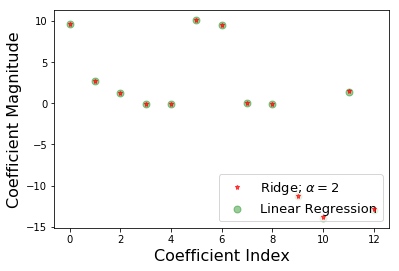

In [188]:
plt.plot(Ridge_model.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 2$',zorder=7) # zorder for ordering the markers
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

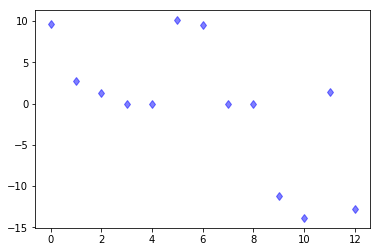

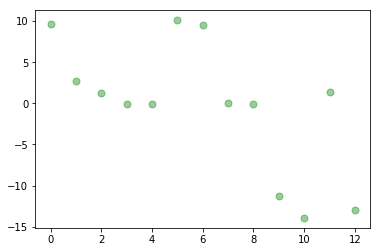

No handles with labels found to put in legend.


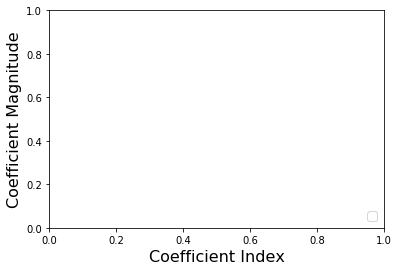

In [185]:
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [311]:
## Logistic Regression
bank = pd.read_csv("bank.csv",delimiter=';')



In [312]:
bank.head(5)
bank.tail(5)
 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [313]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [320]:
bank_data = bank.copy()
bank_data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [323]:
bank_data['y'] = np.where(bank_data['y'] == 'yes', 1,0)


TypeError: invalid type comparison

In [324]:
bank_data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0


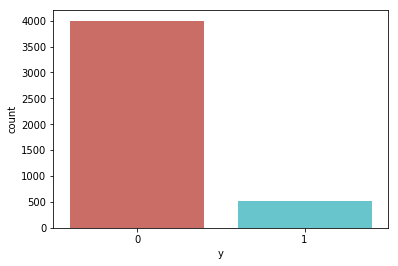

In [325]:
sns.countplot(x='y',data=bank_data,palette='hls')
plt.show()


In [327]:
count_no_sub = len(bank_data[bank_data['y']==0])
count_sub = len(bank_data[bank_data['y']==1])
percent_no_sub = count_no_sub/(count_no_sub + count_sub)
percent_sub = count_sub/(count_no_sub + count_sub)
print("percentage of no subscirpitions are:", percent_no_sub * 100)
print("percentage of subscriptions are:", percent_sub * 100)

percentage of no subscirpitions are: 88.47600088476001
percentage of subscriptions are: 11.523999115239992


In [328]:
## Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.
#Before we go ahead to balance the classes, let’s do some more exploration.

In [329]:
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [330]:
# Observations
#1. The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
#2. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays,
#the better the memory of the last call and hence the better chances of a sale
#3.Surprisingly, campaigns 
#(number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.
# We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [331]:
bank_data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [332]:
bank_data['marital'] = bank_data['marital'].astype('category')
bank_data['education'] = bank_data['education'].astype('category')
bank_data['housing'] = bank_data['housing'].astype('category')
bank_data['loan'] = bank_data['loan'].astype('category')
bank_data['poutcome'] = bank_data['poutcome'].astype('category')
bank_data['y'] = bank_data['y'].astype('category')
#bank_data[['marital'],['education'],['housing'],['loan'],['poutcome']] = bank_data[['marital'],['education'],['housing'],['loan'],['poutcome']].astype('category')

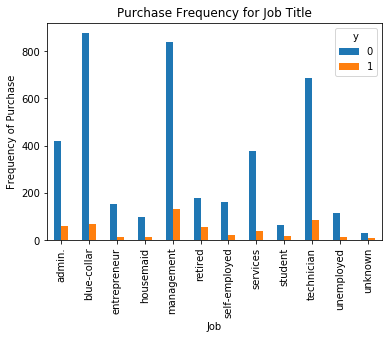

In [333]:
%matplotlib inline
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

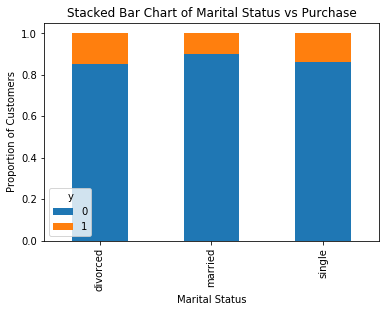

In [334]:
table=pd.crosstab(bank_data.marital,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


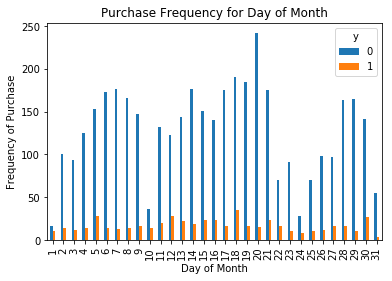

In [335]:
pd.crosstab(bank_data.day,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofMonth_bar')

In [336]:
# Day of month may not be a good predictor of the outcome

In [337]:
#The frequency of purchase of the deposit depends a great 
#deal on the job title. Thus, the job title can be a good predictor of the outcome variable.
# The marital status does not seem a strong predictor for the outcome variable.

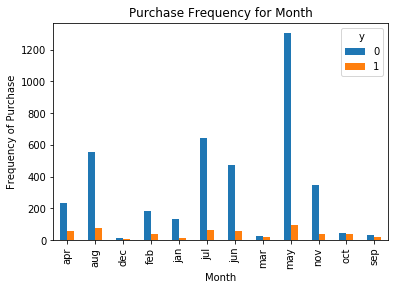

In [338]:
pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [339]:
# Month might be a good predictor of the outcome variable.

In [340]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null category
education    4521 non-null category
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null category
loan         4521 non-null category
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null category
y            4521 non-null category
dtypes: category(6), int64(7), object(4)
memory usage: 415.8+ KB


Text(0, 0.5, 'Frequency')

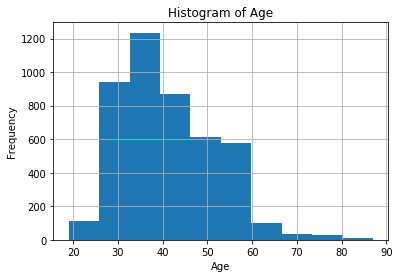

In [341]:
bank_data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [342]:
#Most of the customers of the bank in this dataset are in the age range of 30–40.

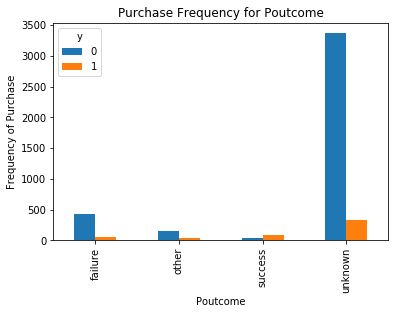

In [343]:
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [ ]:
#Poutcome seems to be a good predictor of the outcome variable.

In [344]:
# Create dummy variables
bank_data.info()
bank_data = pd.get_dummies(bank_data,columns=["job","marital","education","default","housing","loan","contact",'month','day','poutcome'],drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null category
education    4521 non-null category
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null category
loan         4521 non-null category
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null category
y            4521 non-null category
dtypes: category(6), int64(7), object(4)
memory usage: 415.8+ KB


In [345]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 72 columns):
age                    4521 non-null int64
balance                4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
y                      4521 non-null category
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secondary    4521 no

In [346]:
bank_data.head(6)

,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,35,747,141,2,176,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
columns = list(bank_data.columns)
columns

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_7',
 'day_8',
 'day_9',
 'day_10',
 'day_11',
 'day_12',
 'day_13',
 'day_14',
 'day_15',
 'day_16',
 'day_17',
 'day_18',
 'day_19',
 'day_20',
 'day_21',
 'day_22',
 'day_23',
 'day_24',
 'day_25',
 'day_26',
 'day_27',
 'day_28',
 'day_29',
 'day_30',
 'day_31',
 'poutcome_other',
 'poutcome_success',
 'poutcome_

In [348]:
bank_data.isna().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
                      ..
day_5                  0
day_6                  0
day_7                  0
day_8                  0
day_9                  0
day_10                 0
day_11                 0
day_12                 0
day_13                 0


In [349]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 72 columns):
age                    4521 non-null int64
balance                4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
y                      4521 non-null category
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secondary    4521 no

In [350]:
#Over-sampling using SMOTE
#Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
#Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
x = bank_data.loc[:, bank_data.columns != 'y']
y = bank_data.loc[:, bank_data.columns == 'y']

In [351]:
x.head(6)
y.head(6)

,y
0,0
1,0
2,0
3,0
4,0
5,0


In [270]:
!pip install imbalanced-learn

In [352]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
columns= x_train.columns

In [353]:
x_train.shape
y_train.shape
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 565 to 2732
Data columns (total 1 columns):
y    3164 non-null category
dtypes: category(1)
memory usage: 27.9 KB


In [356]:
os_data_x, os_data_y = os.fit_sample(x_train,y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
bank_test.shape

(905, 17)

In [210]:
x_train = bank_train.drop('y',axis=1)
y_train = bank_train['y']
x_test = bank_test.drop('y',axis=1)
y_test = bank_test['y']

In [215]:
import statsmodels.formula.api as sm

In [361]:
Logit_mod= sm.Logit(os_data_y,os_data_x)
result = Logit_mod.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.152342
         Iterations 9
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.780    
Dependent Variable:   y                 AIC:               1854.3186
Date:                 2018-12-24 07:12  BIC:               2325.3388
No. Observations:     5620              Log-Likelihood:    -856.16  
Df Model:             70                LL-Null:           -3895.5  
Df Residuals:         5549              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       9.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0635   0.0055  11.5826 0.0000  0.0527  0.0742
balance             -0.0000 

In [ ]:
# The p-values for most of the variables are smaller than 0.05, except few variables, therefore, we will remove them.

In [401]:
#To get the predictions we need to use predict function of logit model. For this we need to
#supply the coefficients and the data.
predict_train = Logit_mod.predict(params=result.params,exog=os_data_x)
predict_test = Logit_mod.predict(params=result.params,exog=x_test)
pred_train = result.pred_table(threshold=0.5)
pred_train
 

array([[2710.,  100.],
       [ 222., 2588.]])

In [461]:
result.fittedvalues
pred_test = result.predict(x_test)


In [456]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
confusion_matrix= np.array(result.pred_table())
confusion_matrix
true_pos = np.diag(confusion_matrix)
true_pos
false_pos = np.sum(confusion_matrix, axis=0) - true_pos
false_pos
false_neg = np.sum(confusion_matrix, axis=1) - true_pos
precision = confusion_matrix[0,0]/sum(confusion_matrix[:,0])
recall = confusion_matrix[0,0]/sum(confusion_matrix[0,:])
accuracy = sum(np.diag(confusion_matrix))/confusion_matrix.sum()
confusion_matrix[0,:]


array([2710.,  100.])

In [457]:
print("recall", recall)
print("precision",precision)
print("accuracy", accuracy)

recall 0.9644128113879004
precision 0.9242837653478854
accuracy 0.9427046263345196


In [459]:
from sklearn.metrics import roc_curve

In [463]:
fpr,tpr,thresholds=roc_curve(y_true=y_test,y_score=predict_test)

In [464]:
res=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':0.5})

In [465]:
res

,FPR,TPR,Threshold
0,0.000000,0.000000,0.5
1,0.000000,0.005988,0.5
2,0.000000,0.029940,0.5
3,0.005882,0.029940,0.5
4,0.005882,0.035928,0.5
5,0.006723,0.035928,0.5
6,0.006723,0.065868,0.5
7,0.007563,0.065868,0.5
8,0.007563,0.071856,0.5
9,0.008403,0.071856,0.5


No handles with labels found to put in legend.


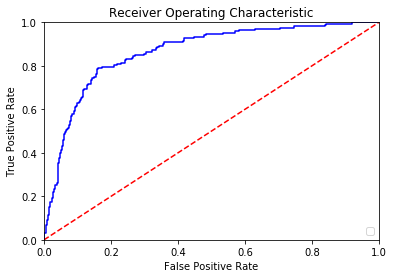

In [466]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [468]:
#6 Split the data into train and test: use function train_test_split
bank_train, bank_test = train_test_split(bank_data, test_size = 0.2)

In [469]:
x_train = bank_train.drop('y',axis=1)
y_train = bank_train['y']
x_test = bank_test.drop('y',axis=1)
y_test = bank_test['y']

In [482]:
from sklearn.linear_model import LogisticRegression

In [483]:
Logit=LogisticRegression()

In [484]:
Model=Logit.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [481]:
Model.coef_

array([[-7.07850588e-03, -9.82883746e-06,  4.07996571e-03,
        -8.24203261e-02,  1.75508020e-04, -1.35458355e-02,
        -4.13567429e-01, -1.33139225e-01, -3.19184245e-01,
        -1.27782356e-01,  5.46936660e-01,  5.36021782e-02,
        -2.65101391e-01,  2.36270536e-01, -3.45432630e-01,
        -8.39876457e-01,  1.94019549e-01, -5.85277738e-01,
        -4.09036293e-01, -7.70029038e-02,  2.33166559e-01,
        -3.95499822e-01,  2.25712495e-01, -2.33206213e-01,
        -7.85169596e-01,  1.36692087e-01, -9.59560100e-01,
        -5.07921685e-01, -2.10651439e-01, -2.37606120e-01,
        -1.33256087e+00, -1.01218503e+00,  1.11560858e-01,
         1.06093210e+00, -8.99305672e-01, -9.93509921e-01,
         1.23677106e+00,  5.47442883e-01,  6.34622513e-02,
        -3.25282803e-01, -5.12603086e-01, -1.08334786e-01,
        -3.94868571e-01, -7.77986780e-01, -4.87671663e-01,
        -1.74637105e-01,  9.44972077e-01, -3.97020980e-01,
         1.30531074e-01,  2.82415053e-01, -5.57343064e-0

In [491]:
y_pred = Logit.predict(x_test)

In [492]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[776  18]
 [ 74  37]]


In [496]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Logit.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [497]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       794
           1       0.67      0.33      0.45       111

   micro avg       0.90      0.90      0.90       905
   macro avg       0.79      0.66      0.69       905
weighted avg       0.88      0.90      0.88       905



In [504]:
Model.predict_proba(x_test)

array([[0.69397914, 0.30602086],
       [0.96763474, 0.03236526],
       [0.86461096, 0.13538904],
       ...,
       [0.99428031, 0.00571969],
       [0.97594293, 0.02405707],
       [0.79645636, 0.20354364]])

In [505]:
fpr,tpr,thresholds=roc_curve(y_true=y_test,y_score=y_pred)

In [506]:
res=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':0.5})


In [507]:
res

,FPR,TPR,Threshold
0,0.00000,0.000000,0.5
1,0.02267,0.333333,0.5
2,1.00000,1.000000,0.5


No handles with labels found to put in legend.


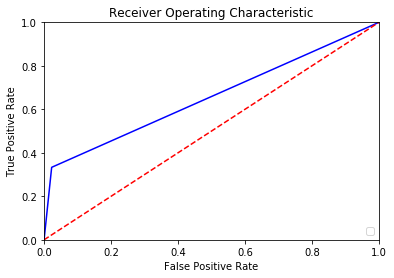

In [508]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
